In [1]:
# Loading all necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import OneClassSVM
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Loading the dataset of user 3
User3 = pd.read_csv('User3_BEHACOM.csv', encoding='latin1')

In [3]:
# Dropping the unnecessary columns
B = User3.drop(columns=['current_app', 'penultimate_app','USER', 'timestamp'])

In [4]:
# Defining training set
B_train = B

# Random scalar
x = 50 

# Defining the testing data        
B_test = B * x

In [5]:
# Scaling the sets
scaler = MinMaxScaler()

# The training data is fitted and transformed
B_train_scaled = scaler.fit_transform(B_train)

# The testing data is transformed
B_test_scaled = scaler.transform(B_test)

print(B_test_scaled)
print(B_train_scaled)

[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 7.91139241e-03
  5.01946729e-04 1.38029015e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.52689873e+00
  9.89944772e-04 2.26782999e-02]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  1.02487101e-03 6.64704345e-02]
 ...
 [1.74418605e+00 1.04166667e+00 3.50000000e+00 ... 7.27848101e-01
  9.39939043e-01 2.48626093e-01]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.18670886e-01
  1.20151320e+00 2.34055511e-01]
 [3.48837209e+00 4.16666667e+00 6.50000000e+00 ... 1.36867089e+00
  1.06512711e+00 3.29703924e-01]]
[[0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.58227848e-04
  9.66726849e-06 2.71331265e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.05379747e-02
  1.94272293e-05 4.48839234e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
  2.01257542e-05 1.32468193e-03]
 ...
 [3.48837209e-02 2.08333333e-02 7.00000000e-02 ... 1.45569620e-02
  1.87984092e-02 4.96779510e-03]

In [6]:
# Constructing the One Class SVM model
model = OneClassSVM(kernel='rbf', gamma='scale', nu=0.1)

In [7]:
# Fitting the model with the training data
model.fit(B_train_scaled)

OneClassSVM(nu=0.1)

In [8]:
# Deriving the decision function values
decisionf = model.decision_function(B_train_scaled)

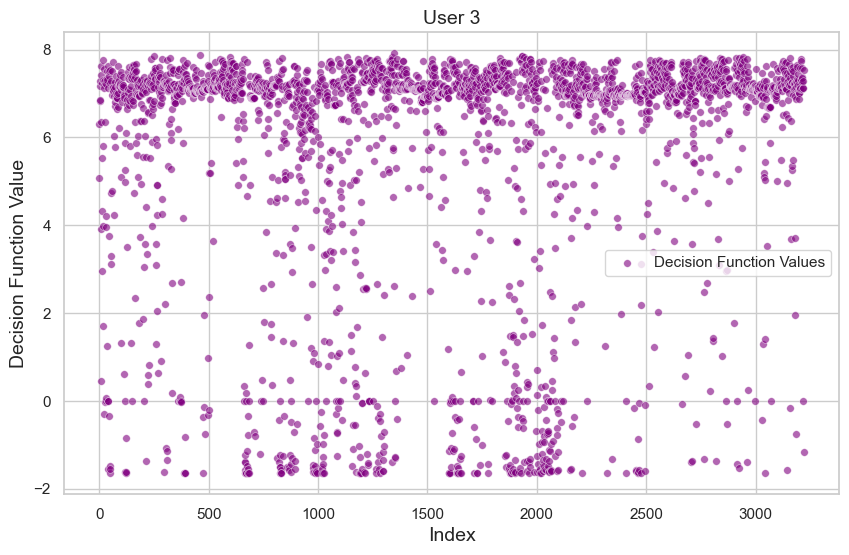

In [9]:
sns.set(style='whitegrid', palette='muted')                     

plt.figure(figsize=(10, 6))

# Plotting the decision function output data
sns.scatterplot(x=range(len(decisionf)),
                y=decisionf, 
                color='purple', 
                marker='o', 
                s=30, 
                label='Decision Function Values', 
                alpha=0.6)

# Customising the plots
plt.title('User 3', fontsize=14)
plt.xlabel('Index', fontsize=14)
plt.ylabel('Decision Function Value', fontsize=14)

plt.grid(True)
plt.legend()

plt.show()